In [2]:
users = [
    {"id": 0, 'name':'Hero'},
    {"id": 1, 'name':'Dunn'},
    {"id": 2, 'name':'Sue'},
    {"id": 3, 'name':'Chi'},
    {"id": 4, 'name':'Thor'},
    {"id": 5, 'name':'Clive'},
    {"id": 6, 'name':'Hicks'},
    {"id": 7, 'name':'Devin'},
    {"id": 8, 'name':'Kate'},
    {"id": 9, 'name':'Klein'},
]

In [3]:
friendship_pairs = [(0,1), (0,2), (1,2), (1,3), (2,3),
(3,4), (4,5), (5,6), (5,7), (6,8), (7,8), (8,9)]

In [4]:
friendships = {user['id']: [] for user in users}
for i, j in friendship_pairs:
    friendships[i].append(j)
    friendships[j].append(i)

friendships    

{0: [1, 2],
 1: [0, 2, 3],
 2: [0, 1, 3],
 3: [1, 2, 4],
 4: [3, 5],
 5: [4, 6, 7],
 6: [5, 8],
 7: [5, 8],
 8: [6, 7, 9],
 9: [8]}

In [5]:
def number_of_friends(user):
    'How many friends does _user_ have?'
    user_id = user['id']
    friend_ids = friendships[user_id]
    return len(friend_ids)

In [6]:
total_connections = sum(number_of_friends(user) for user in users)
total_connections

24

In [7]:
num_users = len(users)
avg_connections = total_connections / num_users
avg_connections

2.4

In [8]:
num_friends_by_id = [(user['id'], number_of_friends(user)) for user in users]
num_friends_by_id.sort(
    key= lambda id_and_friends: id_and_friends[1],
    reverse=True
)

num_friends_by_id

[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1)]

In [12]:
def foaf_ids_bad(user):
    # "foaf" is short for "friend of a friend"
    return [foaf_id
            for friend_id in friendships[user['id']] # for each of user's friends
            for foaf_id in friendships[friend_id]] # get each of _their_ friends

foaf_ids_bad(users[0])

[0, 2, 3, 0, 1, 3]

In [14]:
from collections import Counter

def friends_of_friends(user):
    user_id = user['id']
    return Counter(
        foaf_id
        for friend_id in friendships[user_id]
        for foaf_id in friendships[friend_id]
        if foaf_id != user_id
        and foaf_id not in friendships[user_id]
    )
print(friends_of_friends(users[3]))

Counter({0: 2, 5: 1})


In [15]:
interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

In [18]:
def data_scientists_who_like(target_interest):
    return [user_id
            for user_id, user_interest in interests
            if user_interest == target_interest]

data_scientists_who_like('statistics')

[3, 6]

In [17]:
from collections import defaultdict

In [19]:
user_ids_by_interest = defaultdict(list)

for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)

In [20]:
interests_by_user_id = defaultdict(list)

for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)

In [24]:
def most_common_interests_with(user_id):
    return Counter(interested_user_id
        for interest in interests_by_user_id["user_id"]
        for interested_user_id in user_ids_by_interest[interest]
        if interested_user_id != user_id)



In [25]:
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]

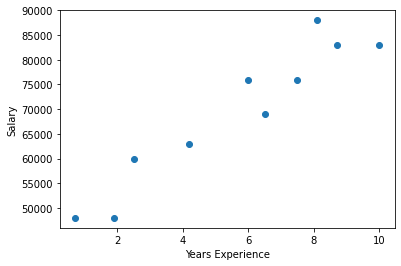

In [28]:
from matplotlib import pyplot as plt

def make_chart_salaries_by_tenure():
    tenures = [tenure for salary, tenure in salaries_and_tenures]
    salaries = [salary for salary, tenure in salaries_and_tenures]
    plt.scatter(tenures, salaries)
    plt.xlabel("Years Experience")
    plt.ylabel("Salary")
    plt.show()

make_chart_salaries_by_tenure()

In [31]:
import plotly.graph_objects as go

def make_chart_salaries_by_year():
    tenures = [tenure for salary, tenure in salaries_and_tenures]
    salaries = [salary for salary, tenure in salaries_and_tenures]
    fig = go.Figure(data=go.Scatter(x=tenures,y=salaries, mode='markers'))
    fig.update_xaxes(title_text='Years')
    fig.update_yaxes(title_text='Salary')
    fig.show()

make_chart_salaries_by_year()